In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath(".")))

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [3]:
# HYPERPARAMETER
RESULT_DIR = "../result/3p_sa_um_pp.msv/"

In [4]:
# PREDS SAVE MOT2D RESULT AS DICT, WITH KEY INDICATING FRAME ID, VALUE INDICATE TRACKED OBJECT (TID, BBOX)
preds = {}
with open(osp.join(RESULT_DIR, 'pred.txt'), 'r') as f:
    lines = [ line for line in f.read().split('\n') if len(line) > 0 ]
    for line in lines:
        fields = [ f for f in line.split(",") if len(f) > 0 ]
        fid = int(fields[0])
        tid = fields[1]
        bbox = np.array([ float(v) for v in fields[2:2+4] ])
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]
        if fid not in preds:
            preds[fid] = []
        preds[fid].append((tid, bbox))

In [5]:
# SNAPSHOTS IS A LIST OF SNAPSHOT, A SNAPSHOT RECORDS FEATURE REPRESENTATION ON EACH TRACK
with open(osp.join(RESULT_DIR, 'snapshots.pkl'), 'rb') as f:
    snapshots = pickle.load(f)

In [6]:
# WHICH TRACKS I WANT TO AGGREGATE ALL THE FEATURES
TARGET_TRACKS = [1]

In [7]:
# AGGREGATE TARGET FEATURES TOGETHER
all_features = []
for snapshot in snapshots:
    for tid, features in snapshot.items():
        if tid in TARGET_TRACKS:
            if len(all_features) == 0:
                all_features = np.array(features)
            else:
                all_features = np.concatenate([all_features, np.array(features)])

In [8]:
# SUBSAMPLING FEATURES TO RENDER
sub_samples = 3000
n_samples = all_features.shape[0]
indices = np.random.choice(np.arange(n_samples), sub_samples, replace=False)
features = all_features[indices]

In [9]:
# Visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

# tsne = TSNE(n_components=2, perplexity=15, n_iter=1000)
# reduced = tsne.fit_transform(reduced)

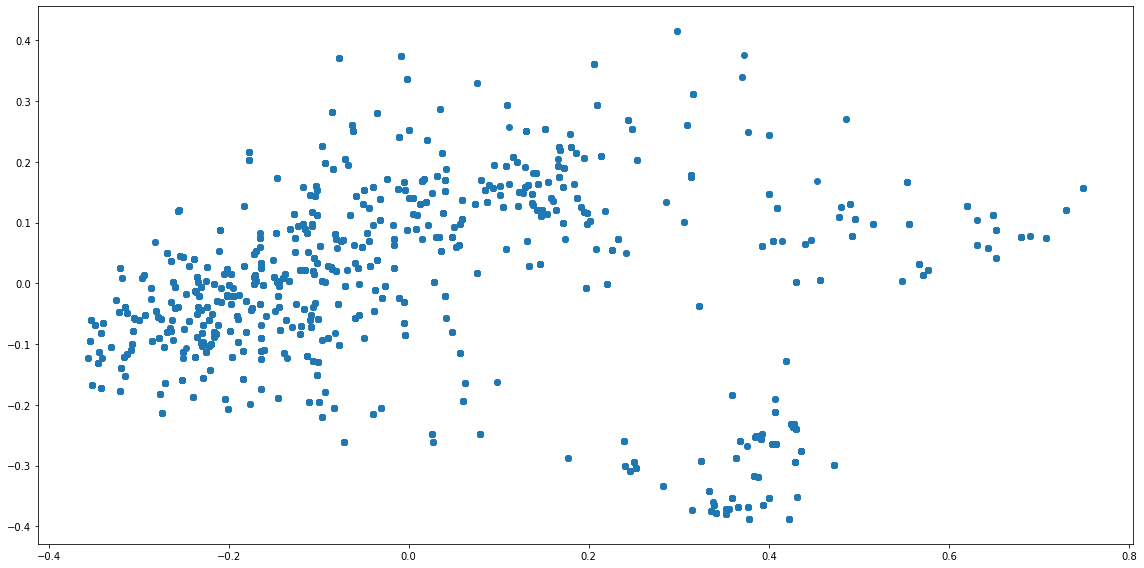

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.tight_layout()